In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
sns.set_theme()

# Small introduction

A classifier classifies a observed value $\mathbf{x} \in \mathbb{R}^d$ into one of $k$ classes.

$$
f_{\alpha} : \mathbf{x} \rightarrow \{ 1, ... , k \}
$$

The loss is the penalty for classifying $\alpha_i$ when the true label is $j$, $L_{ij}(\alpha_i | c = j)$.

With the bayes rule, we can find the probability of assigning class $j$ to $\mathbf{x}$ given $\mathbf{x}$:

$$
p(c = j | \mathbf{x}) = \frac{p(\mathbf{x} | c = j) p(c = j)}{p(\mathbf{x})} \propto p(\mathbf{x} | c = j) p(c = j)
$$

Choosing the class comes with an expected loss (conditional risk or posterior expected loss) given by choosing the action $\alpha_i$, which can be seen as the weighting of the probability of a class by it's loss.

$$
R(f_{\alpha,i} | \mathbf{x}) = \sum^{k}_{j=1} L_{ij} P(c_j | \mathbf{x})
$$

Finding the optimal classifier comes through the minimization of the overall risk of a classifier $f_{\alpha}$

$$
R(f_{\alpha}) = \int_{R^d} R(f_{\alpha} (\mathbf{x}) | \mathbf{x}) p(\mathbf{x}) d \mathbf{x}
$$

The function which optimises this risk is called the Bayes optimal classifier and which gives the mapping $f$:

$$
f(\mathbf{x}) = \arg \min_{i} \sum^{k}_{j=1} L_{ij} p(c = j | \mathbf{x})
$$

Because the probabilities can be seen as constants, we want to find $f$ which minimizes the loss of for choosing a specific action $\alpha_i$.

# Two Classes

The bayes optimal classifier is defined by the zero crossing of the Bayes optmial discriminant function

$$
G(\mathbf{x}) = \mathbb{P}(c_1 | \mathbf{x}) - \mathbb{P}(c_2 | \mathbf{x}) \Leftrightarrow g(\mathbf{x}) = \log \frac{\mathbb{P}(c_1 | \mathbf{x})}{\mathbb{P}(c_2 | \mathbf{x})}
$$

This is difficult to calculate as it would require knowledge of the distribution of $\mathbf{x}$. Thus we look at other functions and define our linear discriminant functions:

$$
g(\mathbf{x} ; \mathbf{w}) = w_0 + \mathbf{w}^T \mathbf{x}
$$

And setup a decision boundary:

$$
y_i =
\begin{cases}
c_1 \quad \text{if} \ g(\mathbf{x} ; \mathbf{w}) > 0 \\
c_2 \quad \text{if} \ g(\mathbf{x} ; \mathbf{w}) < 0 \\
g(\mathbf{x} ; \mathbf{w}) = 0 \Rightarrow \text{Decision surface}
\end{cases}
$$

In [2]:
np.random.seed(0)
class1 = stats.multivariate_normal([-1.5, -1.5], [[0.3, 0], [0, 0.3]])
class2 = stats.multivariate_normal([1.5, 1.5], [[0.3, 0], [0, 0.3]])

class1_points = class1.rvs(size=30)
class2_points = class2.rvs(size=30)

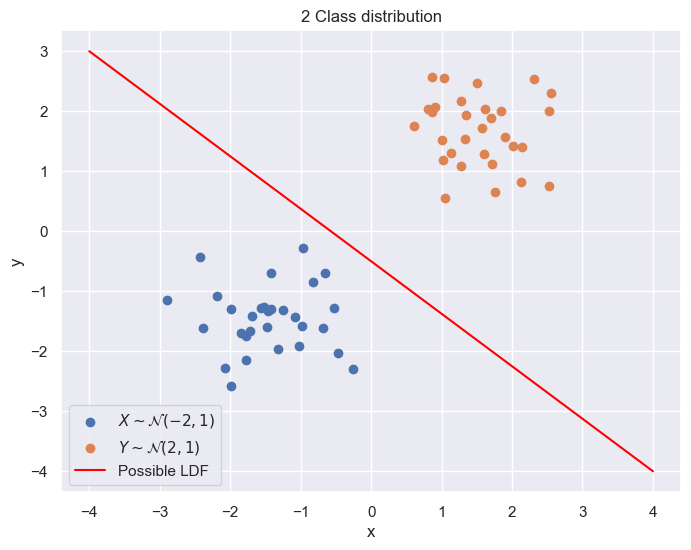

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(class1_points[:, 0], class1_points[:, 1], label=r'$X \sim \mathcal{N}(-2, 1)$')
plt.scatter(class2_points[:, 0], class2_points[:, 1], label=r'$Y \sim \mathcal{N}(2, 1)$')
plt.plot([-4, 4], [3, -4], label='Possible LDF', color='red')
plt.title('2 Class distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show();

### Basis functions

We can use basis functions $\{ b_1(\mathbf{x}), ..., b_m(\mathbf{x}) \}$ where $b_i(\mathbf{x}) :  \mathbb{R}^d \mapsto \mathbb{R}$ to expand our sample space, by using basis functions we can move away from only using linear seperators and can go to quadratic or higher polynomial seperator functions.

$$
g(\mathbf{x};\mathbf{w}) = w_0 + w_1 b_1(\mathbf{x}) + ... + w_m b_m(\mathbf{x})
$$

The below example has the function

$$
g(\mathbf{x};\mathbf{w}) = x^2 + y^2
$$

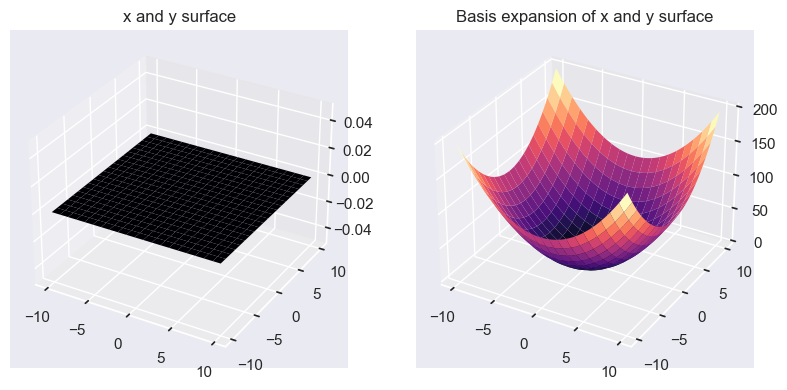

In [4]:
n = 10
step = .1
X1 = np.arange(-n, n, step)
X2 = np.arange(-n, n, step)
X, Y = np.meshgrid(X1, X2)
zero = np.zeros((int(2*n / step), int(2*n / step)))

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, zero, cmap=cm.magma, rstride=10, cstride=10, linewidth=0)
ax.set_title('x and y surface')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, (X**2 + Y**2), cmap=cm.magma, rstride=10, cstride=10, linewidth=0)
ax.set_title('Basis expansion of x and y surface')

plt.show()

Through this we may seperate classes which before, through a linear function were inseperable

# Seperable case

We say two classes are linearly seperable if there exist a function $g(\mathbf{x}; \mathbf{w}) = \mathbf{w}^T \mathbf{x}$ where every class is correctly classified by this function. For example figure 1 shows a linearly seperable classifier.

(Normalization is the process of replacing the negative class by its negative, so that they are mirrored around the axis and  $\mathbf{w}^T \mathbf{x} > 0$

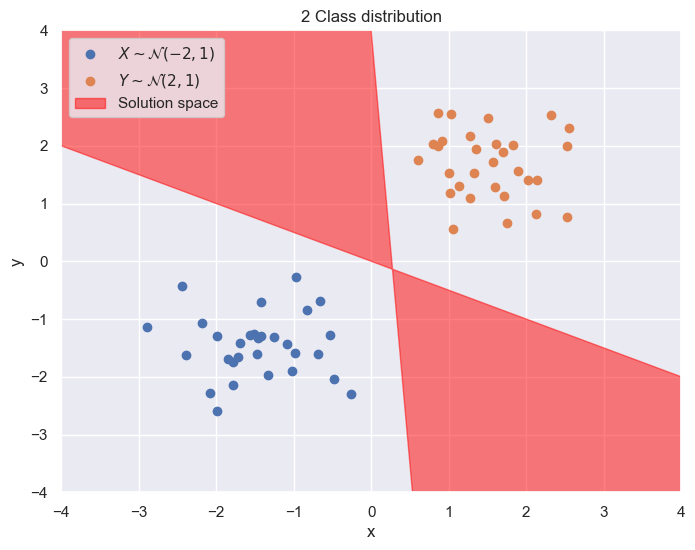

In [5]:
x = np.arange(-10, 10, 0.1)

f1 = lambda x : -15 * x + 4
f2 = lambda x : (-0.5* x + 0)

y1 = f1(x)
y2 = f2(x)

plt.figure(figsize=(8, 6))
plt.scatter(class1_points[:, 0], class1_points[:, 1], label=r'$X \sim \mathcal{N}(-2, 1)$')
plt.scatter(class2_points[:, 0], class2_points[:, 1], label=r'$Y \sim \mathcal{N}(2, 1)$')
plt.fill_between(x, y1, y2, color='red', alpha=0.5, label='Solution space')
plt.title('2 Class distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-4, 4])
plt.xlim([-4, 4])
plt.show();

# Gradient descent (Batch perceptron algorithm)

We define firstly a cost function to the classification of the two classes which works as a penalty giver which we can minimize over. The minimization over the missclassifiction automatically optimises our classifier. In gradient descent we start with an initial value $\mathbf{w}^{(1)}$ and use the gradient of a function, which points to the steepest ascent of the function, and move the opposite way towards a minima.

$$
\mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \eta^{(k)} \nabla J(\mathbf{w}^{(k)}) 
$$

We choose $J(\mathbf{w})$ as the amount of missclassified samples (Set $\mathcal{M}(\mathbf{w})$)

$$
J(\mathbf{w}) = \sum_{y \in \mathcal{M}} - \mathbf{w}^T \mathbf{x}
$$

Since our data is normalised, $-\mathbf{w}^T \mathbf{x}$ is always $< 0$, $J$ is zero when $\mathbf{w}$ is a solution. The gradient of this function is given by:

$$
\nabla J(\mathbf{w}) = - \sum_{y \in \mathcal{M}} \mathbf{x}
$$

This in total our gradient descent steps are given by 

$$
\mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} + \eta^{(k)} \sum_{y \in \mathcal{M}} \mathbf{x}
$$

Instead of calculating the whole sum in a batch and subtracting it all at once, we can also do this in a sequential, single sample updating way where at every iteration $k$ we change our $\mathbf{w}$ for one missclassified $\mathbf{x}^k$ (k-th missclassified $\mathbf{x}$)

$$
\mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} + \eta^k \mathbf{x}^k
$$

By the **Perceptron convergence Theorem** for $\eta = 1$, if the classes are linearly seperable then $\mathbf{w}$ will converge to the optimal solution $\mathbf{w}^*$ in a bounded time.

Problems:
- There exist many solution
- There may be better solutions (equal seperation margin between classes) which the algorithm can't willingly converge to
- The number of steps to $\mathbf{w}^*$ may be very large
- If the classes are not seperable, the algorithm will not converge and won't terminate

### Generative classifier

A generative classifier specifies how to generate data using the class densities, likelihood/posterior of each class is examined and classification is done by assigning to the most likely class.
It tries to model a class and in particular it models how a class would generate input data. When given new data it tries to predict which class would have most likely generated the given observation.

### Discriminative classifier

A discriminative classifier learns which features in the input are the most usefull and with these tries to distinguish between the various classes. They focus on modeling class bounderies ar the class membership probability directly.



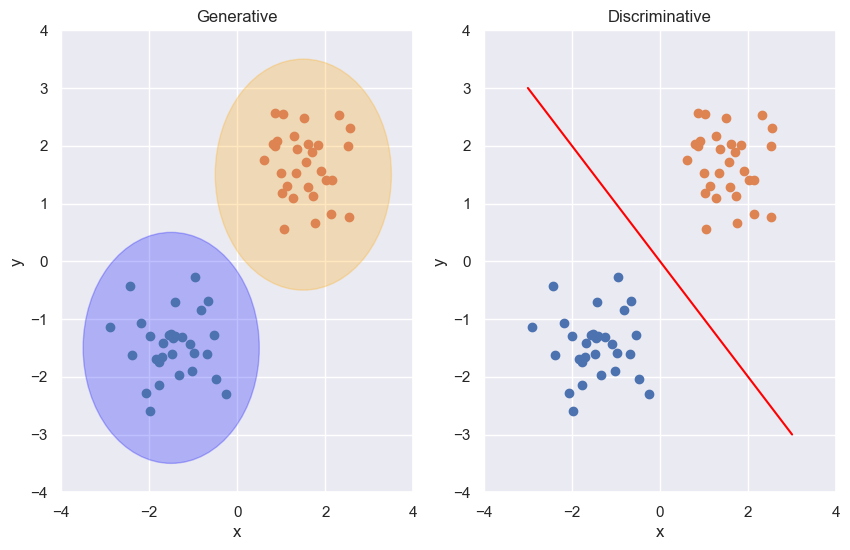

In [6]:
c1 = plt.Circle((-1.5, -1.5), 2, color='blue', alpha=0.25)
c2 = plt.Circle((1.5, 1.5), 2, color='orange', alpha=0.25)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].add_patch(c1)
axs[0].add_patch(c2)
axs[0].scatter(class1_points[:, 0], class1_points[:, 1])
axs[0].scatter(class2_points[:, 0], class2_points[:, 1])
axs[0].set_title('Generative')
axs[0].set_ylim([-4, 4])
axs[0].set_xlim([-4, 4])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].scatter(class1_points[:, 0], class1_points[:, 1])
axs[1].scatter(class2_points[:, 0], class2_points[:, 1])
axs[1].plot([-3, 3], [3, -3], color='red')
axs[1].set_ylim([-4, 4])
axs[1].set_xlim([-4, 4])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

axs[1].set_title('Discriminative')
plt.show()

# Generative Classifiers

We want to model the conditional class density $p(\mathbf{x} | c)$. Given a conditional class density which depends on some parameters $\mathbf{w}$, $p_{\mathbf{w}_j}(\mathbf{x} | c = j)$. To then find the optimal parameters we may want to find the maximum log likelihood:

$$
\mathbf{\hat{w}}_{MLE} = \arg \max_{\mathbf{w}} \sum_{i=1}^n \log p_{\mathbf{w}} (\mathbf{x}_i | c_i)
$$

Using then the bayes rule we can find the probability of the class $c_j$ given $\mathbf{x}$, i.e. $p(c_j | \mathbf{x})$.

### LDA

In Linear Discriminant Analysis (LDA) we use a gaussian model for the conditional class probability where all classes share the same covariance

$$
p_{\mathbf{w}} (\mathbf{x} | c = j ) = \mathcal{N}(\mathbf{x} ; \mathbf{\mu}_j, \Sigma)
$$
Using the Bayes optimal discriminant function we get:

$$
g(\mathbf{x}) = \log \frac{\mathbb{P}(c_1 | \mathbf{x})}{\mathbb{P}(c_2 | \mathbf{x})} \overset{\text{Bayes rule}}{=}  \log \frac{\mathbb{P}(c_1)\mathcal{N}(\mathbf{x} ; \mathbf{\mu}_1, \Sigma)}{\mathbb{P}(c_2)\mathcal{N}(\mathbf{x} ; \mathbf{\mu}_2, \Sigma)}
= \underbrace{\log \frac{\mathbb{P}(c_1)}{\mathbb{P}(c_2)} - \frac{1}{2}(\mathbf{\mu}_1 + \mathbf{\mu}_2)^T \Sigma^{-1}(
\mathbf{\mu}_1 - \mathbf{\mu}_2)}_{\in \mathbb{R} \Rightarrow w_0} + \underbrace{\frac{1}{2}(\mathbf{\mu}_1 - \mathbf{\mu}_2)^T
\Sigma^{-1} \mathbf{x}}_{\mathbf{w}^T \mathbf{x}} = w_0 + \mathbf{w}^T \mathbf{x}
$$

We can estimate $\Sigma$ and $\mu$ through our data, where we than can find $\mathbf{w}$, with $\hat{\Sigma} = \frac{1}{2}(\Sigma_1 + \Sigma_2)$ by calculating

$$
\mathbf{w}^F = \hat{\Sigma}^{-1}(\mathbf{m}_1 - \mathbf{m}_2)
$$

Where then $\mathbf{w}^F$ asymptotically coincides with the Bayes-optimal $\mathbf{w}$ if the Gaussian model is a correct assumption.

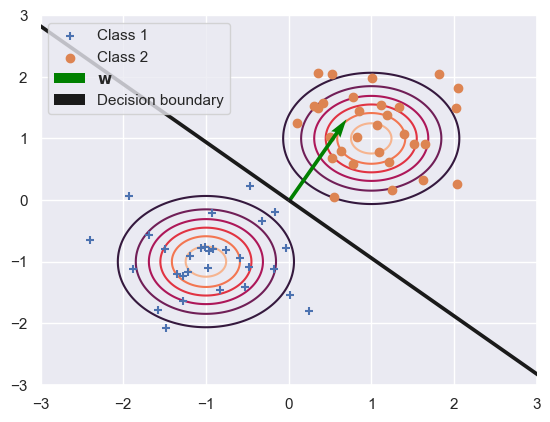

In [7]:
np.random.seed(0)
x = np.arange(-10, 10, 0.01)

X, Y = np.meshgrid(x, x)
pos = np.dstack((X, Y))
normal_1 = stats.multivariate_normal([-1, -1], [[0.3, 0], [0, 0.3]])
normal_2 = stats.multivariate_normal([1, 1], [[0.3, 0], [0, 0.3]])

rvs_normal_1 = normal_1.rvs(size=30).T
rvs_normal_2 = normal_2.rvs(size=30).T

Z1 = normal_1.pdf(pos)
Z2 = normal_2.pdf(pos)

class1_mean = np.mean(rvs_normal_1, axis=1)
class2_mean = np.mean(rvs_normal_2, axis=1)
class1_cov = np.cov(rvs_normal_1)
class2_cov = np.cov(rvs_normal_1)
cov_estimate = 0.5 * (class1_cov + class2_cov)

w = np.linalg.inv(cov_estimate) @ (class1_mean - class2_mean)
w /= -1 * np.linalg.norm(w)

v = np.random.rand(2)
v -= v.dot(w) * w
v /= np.linalg.norm(v)

plt.contour(X, Y, Z1, zorder=1)
plt.contour(X, Y, Z2, zorder=1)
plt.scatter(rvs_normal_1[0, :], rvs_normal_1[1, :], marker='+', zorder=5, label='Class 1')
plt.scatter(rvs_normal_2[0, :], rvs_normal_2[1, :], marker='o', zorder=5, label='Class 2')
plt.quiver(0, 0, w[0], w[1], scale=5, zorder=10, color='green', label=r'$\mathbf{w}$')
plt.quiver(0, 0, v[0], v[1], scale=0.1, zorder=10)
plt.quiver(0, 0, -v[0], -v[1], scale=0.1, zorder=10, label='Decision boundary')

plt.legend().set_zorder(20)
plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.show()

# Discriminate Classifiers

Using again the bayes formula on the bayes optimal discriminant function, with the classes 1 and 0:

$$
g(\mathbf{x}) = \log \frac{\mathbb{P}(c = 1|\mathbf{x})}{\mathbb{P}(c = 0|\mathbf{x})} = \log \frac{\mathbb{P}(\mathbf{x}|c = 1) \mathbb{P}(c = 1)}{\mathbb{P}(\mathbf{x}|c = 0)\mathbb{P}(c = 0)} \Leftrightarrow \mathbb{P}(\mathbf{x}|c = 1) = e^{g(\mathbf{x})} \mathbb{P}(\mathbf{x}|c = 0) \frac{\mathbb{P}(c = 0)}{\mathbb{P}(c = 1)}
$$

### Logistic regression

Logistic regression uses a linear discriminant function, i.e. $g(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0$. For the special case that $\mathbb{P}(\mathbf{x} | c) = \mathcal{N}(\mathbf{x};\mu_{0, 1} \Sigma)$, the LR is the same as the LDA.

Consider a two class problem $c \in \{0, 1\}$, this can be modelled by a Bernoulli distribution. The success probability of a Bernoulli RV is given by $\pi(\mathbf{x})=\mathbb{P}(1 | \mathbf{x})$. The general system is then given by:

$$
\mathbb{P}(c | \mathbf{x}) = \pi(\mathbf{x})^c (1 - \pi(\mathbf{x}))^{1 - c}
$$

because

$$
g(\mathbf{x}) = \log \frac{\mathbb{P}(c = 1|\mathbf{x})}{\mathbb{P}(c = 0|\mathbf{x})} = \log \frac{\pi(\mathbf{x})}{1 - \pi(\mathbf{x})}
$$

We get the so called Sigmoid, or logistic 'squashing function'

$$
\pi(\mathbf{x}) = \frac{\exp(g(\mathbf{x}))}{1 + \exp(g(\mathbf{x}))} = \sigma(g(\mathbf{x}))
$$

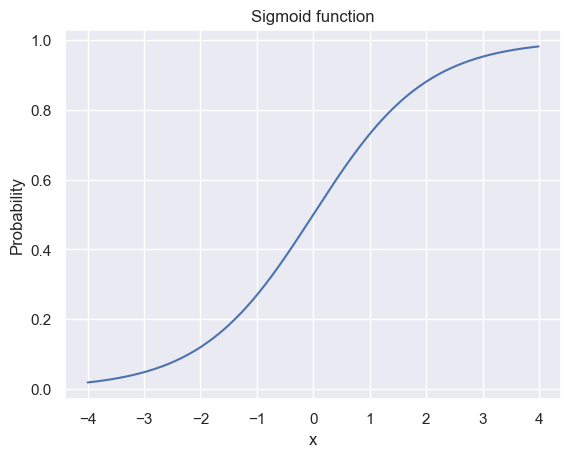

In [8]:
sigmoid = lambda x : np.exp(x) / (1 + np.exp(x))

x = np.arange(-4, 4, 0.01)

plt.plot(x, sigmoid(x))
plt.title('Sigmoid function')
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

£The extension of the sigmoid function to $K$ classes is called the softmax function

$$
\mathbb{P}(c = k | \mathbf{x}) = \frac{\exp(g_k(\mathbf{x}))}{\sum^{K}_{m = 1} \exp(g_m(\mathbf{x}))}
$$

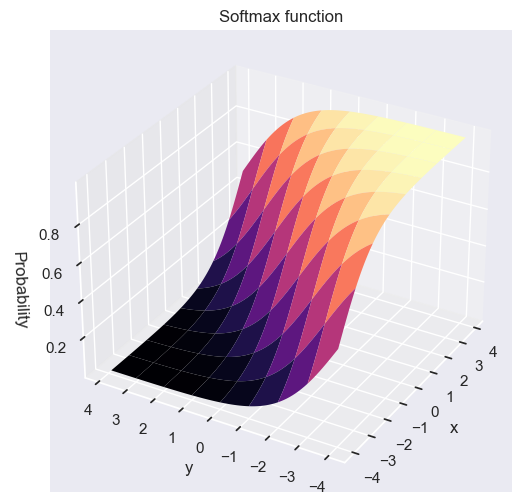

In [9]:
softmax = lambda x, y : np.exp(x) / (np.exp(x) + np.exp(y))

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)

Z = softmax(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.magma, rstride=10, cstride=10, linewidth=0)
ax.view_init(elev=30, azim=-150)
ax.set_zlabel('Probability')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Softmax function')

plt.show()

In logistic regression we estimate $\mathbf{w}$ by maximizing the conditional likelihood:

$$
\hat{\mathbf{w}}_{DISCR} = \arg \max_{\mathbf{w}} \prod^n_{i = 1} (\pi(\mathbf{x}_i;\mathbf{w}))^{c_i} (1 - \pi(\mathbf{x}_i ; \mathbf{w}))^{1 - c_i}
$$

or by minimizing tis negative log likelihood:

$$
-I(\mathbf{w}) = - \sum^n_{i = 1} [ c_i \log \pi(\mathbf{x}_i ; \mathbf{w}) + (1 - c_i) \log (1 - \pi(\mathbf{x}_i ; \mathbf{w})) ]
$$

The optimal $\mathbf{w}$ can be found by using gradient descent on the gradient of this negative log likelihood

$$
\nabla_{\mathbf{w}} I = \sum^n_{i=1} \mathbf{x}_i(c_i - \pi_i) 
$$

Where $\pi_i$ is the softmax probability of class $i$ given $\mathbf{x}$

$$
\mathbf{w}^{k + 1} = \mathbf{w}^k + \eta \nabla_{\mathbf{w}^k} = \mathbf{w}^k + \eta (c_i - \pi_i^k)\mathbf{x}_i
$$

If we make the approximation: 

$$
\hat{c}_i = \arg \max_{c \in \{0, 1\} } \pi_i^k 
$$
and set $\pi_i^k \mapsto \hat{c}_i$ we get again our perceptron because if $\hat{c}_i = c_i$ then then $\mathbf{w}^{k + 1} = \mathbf{w}^k$

$$
\mathbf{w}^{k + 1} = \mathbf{w}^k + \eta \mathbf{x}_i
$$

In [50]:
def logistic_regression_gradient_descent(X: np.array, y: np.array, 
                                         eta: float = 0.2, max_iterations: int = 10000) -> np.array:
  n, m = X.shape
  w = np.random.rand(n)
  i = 0
  eps = 0.01
  
  converged = False
  while not converged and not i > max_iterations:
    y_pred = 1 / (1 + np.exp(-w.T @ X))
    gradient = data_w @ (y - y_pred)  
    w_new = w + eta * gradient 
    converged = np.linalg.norm(w - w_new) < eps
    w = w_new
    i += 1
    
  return w

In [51]:
x = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(x, x)
pos = np.dstack((X, Y))

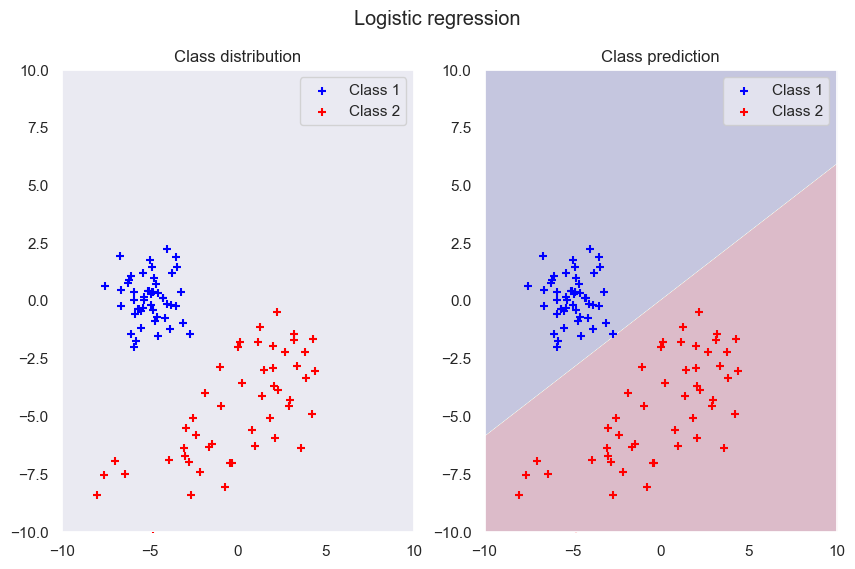

In [59]:
np.random.seed(0)
normal_1 = stats.multivariate_normal([-5, -0], [[1, 0], [0, 1]])
normal_2 = stats.multivariate_normal([0, -5], [[10, 5], [5, 5]])
rvs_normal_1 = normal_1.rvs(size=50).T
rvs_normal_2 = normal_2.rvs(size=50).T

y = np.hstack(([0] * 50, [1] * 50))
w = np.random.rand(3)
data = np.hstack((rvs_normal_1, rvs_normal_2))
data_w = np.vstack(([1] * 100, data))

w = logistic_regression_gradient_descent(data_w, y)
w /= np.linalg.norm(w) 

points = np.vstack([np.ones(X.size), X.ravel(), Y.ravel()])
dot_product = w @ points
Z = np.sign(dot_product.reshape(X.shape))

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].scatter(rvs_normal_1[0, :], rvs_normal_1[1, :], marker='+', zorder=5, label='Class 1', color='blue')
axs[0].scatter(rvs_normal_2[0, :], rvs_normal_2[1, :], marker='+', zorder=5, label='Class 2', color='red')
axs[1].scatter(rvs_normal_1[0, :], rvs_normal_1[1, :], marker='+', label='Class 1', color='blue')
axs[1].scatter(rvs_normal_2[0, :], rvs_normal_2[1, :], marker='+', label='Class 2', color='red')

axs[1].imshow(Z, extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', cmap='RdYlBu_r', alpha=0.2, aspect='auto')

axs[0].grid(False)
axs[1].grid(False)
axs[0].set_xlim([-10, 10])
axs[1].set_xlim([-10, 10])
axs[0].set_ylim([-10, 10])
axs[1].set_ylim([-10, 10])
axs[0].legend()
axs[1].legend()
plt.suptitle('Logistic regression')
axs[0].set_title('Class distribution')
axs[1].set_title('Class prediction')
plt.show()

C:\Users\mathi\AppData\Local\Temp\ipykernel_26072\1624215551.py:10: RuntimeWarning: overflow encountered in exp
  y_pred = 1 / (1 + np.exp(-w.T @ X))


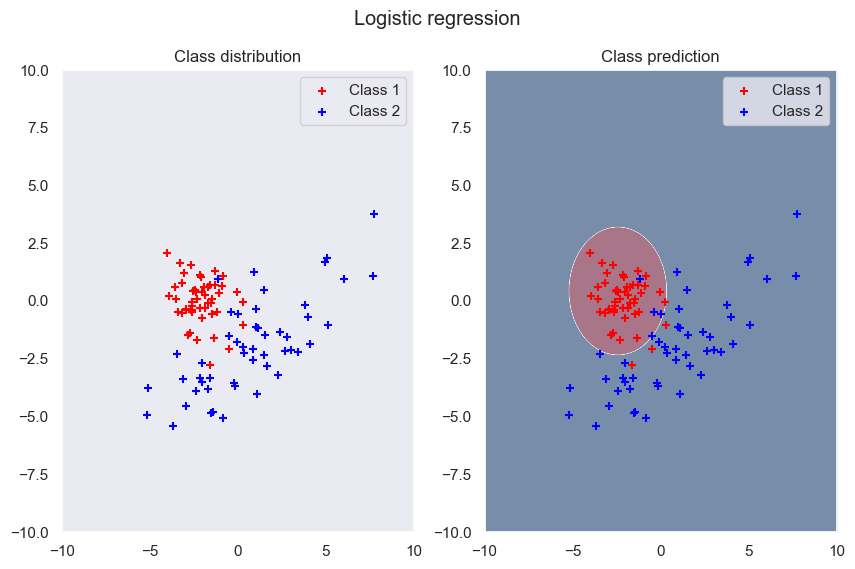

In [60]:
normal_1 = stats.multivariate_normal([-2, -0], [[1, 0], [0, 1]])
normal_2 = stats.multivariate_normal([0, -2], [[10, 5], [5, 5]])
rvs_normal_1 = normal_1.rvs(size=50).T
rvs_normal_2 = normal_2.rvs(size=50).T

y = np.hstack(([0] * 50, [1] * 50))
w = np.random.rand(4)
data = np.hstack((rvs_normal_1, rvs_normal_2))
data_w = np.vstack(([1] * 100, data, data[0, :]**2 + data[1, :]**2))
w = logistic_regression_gradient_descent(data_w, y)
w /= np.linalg.norm(w)

points = np.vstack([np.ones(X.size), X.ravel(), Y.ravel(), X.ravel() ** 2 + Y.ravel() ** 2])
dot_product = w @ points
Z = np.sign(dot_product.reshape(X.shape))

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].scatter(rvs_normal_1[0, :], rvs_normal_1[1, :], marker='+', zorder=5, label='Class 1', color='red')
axs[0].scatter(rvs_normal_2[0, :], rvs_normal_2[1, :], marker='+', zorder=5, label='Class 2', color='blue')

axs[1].scatter(rvs_normal_1[0, :], rvs_normal_1[1, :], marker='+', label='Class 1', color='red')
axs[1].scatter(rvs_normal_2[0, :], rvs_normal_2[1, :], marker='+', label='Class 2', color='blue')

img = axs[1].imshow(Z, extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', cmap='RdBu', alpha=0.5, aspect='auto')

axs[0].grid(False)
axs[1].grid(False)
axs[0].set_xlim([-10, 10])
axs[1].set_xlim([-10, 10])
axs[0].set_ylim([-10, 10])
axs[1].set_ylim([-10, 10])
axs[0].legend()
axs[1].legend()
plt.suptitle('Logistic regression')
axs[0].set_title('Class distribution')
axs[1].set_title('Class prediction')
plt.show()